# INTRODUCTION 

Using a dataset available on Kaggle of apps available on the [Google Play Store](https://www.kaggle.com/lava18/google-play-store-apps), we'll do some fundamental exploration and visualization of these data and examine some of the most popular apps that are used. 

### STEP 1: Loading the necessary libraries + Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
%matplotlib inline

In [2]:
android = pd.read_csv("C:/Users/micha/Documents/MyDatasets/googleplaystore.csv")

### STEP 2: Initial look at the data

In [3]:
android.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [4]:
android.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Looking at these variables, it seems that they represent the following:

| **Variable**         | **Description**                                                     |
|----------------------|---------------------------------------------------------------------|
| app                  | Name of app |
| category             | Main category of the app |
| rating               | Overall rating of the app |
| reviews              | Number of reviews for the app | 
| size                 | size of the app in terms of bytes |
| installs             | Number of installations of the app |
| Type                 | is it free / paid-for-subscription |
| price                | How much does the app cost |
| content rating       | Content rating for the app |
| Genres               | General purpose for the app |
| last updated         | date of last system update  |
| current version      | what is the current version of the app | 
| android version      | minimum requirement of android OS system to use the app |

In [5]:
android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
android.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There appears to be some missing values for several variables (notably, "Rating", "Type", "Content Rating", "Current Ver" and "Android Ver").  Some of these variables also appears to need some re-vamping (i.e., proper type formating). 

### STEP 3: Looks like we'll be doing some cleaning

Let's start by eliminating rows where there are missing entries

In [7]:
android = android[android['Content Rating'].notnull()] # remove the rows with missing Content Ratings 
android = android[android['Current Ver'].notnull()] # removed rows with missing Current Ver 
android = android[android['Android Ver'].notnull()] # removes rows with missing Android Ver
android = android[android['Type'].notnull()] # Removes rows with missing type 
android = android[android['Rating'].notnull()] # removes rows with missing Rating 

In [11]:
android.shape

(9360, 13)

Now we will work on reformatting the data type for certain variables

In [12]:
android['Reviews'] = android['Reviews'].astype(float)
android['Price'] = android['Price'].str.replace("$", "").astype(float)
android["Last Updated"] = pd.to_datetime(android['Last Updated'])

In [13]:
android.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9360 non-null   object        
 1   Category        9360 non-null   object        
 2   Rating          9360 non-null   float64       
 3   Reviews         9360 non-null   float64       
 4   Size            9360 non-null   object        
 5   Installs        9360 non-null   object        
 6   Type            9360 non-null   object        
 7   Price           9360 non-null   float64       
 8   Content Rating  9360 non-null   object        
 9   Genres          9360 non-null   object        
 10  Last Updated    9360 non-null   datetime64[ns]
 11  Current Ver     9360 non-null   object        
 12  Android Ver     9360 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 1023.8+ KB


The next step is to handle the duplicate entries found in this data set. The best approach is finding out how many are there and see what can be used to differentiate one from another.

In [19]:
android['App'].value_counts()[android['App'].value_counts() > 1]

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
ESPN                                                 7
8 Ball Pool                                          7
                                                    ..
Asana: organize team projects                        2
Final Fantasy XV: A New Empire                       2
Mango Languages: Lovable Language Courses            2
BuzzFeed: News, Tasty, Quizzes                       2
Topbuzz: Breaking News, Videos & Funny GIFs          2
Name: App, Length: 789, dtype: int64

Looks like I have 789 entries that needs to be accounted for. 

Since we're using number of reviews to delineate b/t duplicates where we keep the one with the highest count, we will sort everything by way of highest count first. Then, we will drop duplicates where we keep only the first occurence of it. 

In [21]:
android_ordered = android.sort_values("Reviews", ascending = False) 
android_ordered = android_ordered.drop_duplicates("App", keep = 'first') 
android_ordered['App'].value_counts()

Abs, Core & Back Workout Challenge                    1
X Launcher Pro: PhoneX Theme, OS11 Control Center     1
FR Roster                                             1
Photo Collage Editor                                  1
US Mission - buy gourmet movie KTV                    1
                                                     ..
Interracial Match Dating App                          1
Nature Sounds                                         1
DU GIF Maker: GIF Maker, Video to GIF & GIF Editor    1
Dormi - Baby Monitor                                  1
P Launcher for Android™ 9.0                           1
Name: App, Length: 8190, dtype: int64

The last step is to deal with non-ASCII characters (namely non-English ones)

In [22]:
name_app = []

for each in android_ordered['App']:
    name_app.append(each)
    
name_app

['Facebook',
 'WhatsApp Messenger',
 'Instagram',
 'Messenger – Text and Video Chat for Free',
 'Clash of Clans',
 'Clean Master- Space Cleaner & Antivirus',
 'Subway Surfers',
 'YouTube',
 'Security Master - Antivirus, VPN, AppLock, Booster',
 'Clash Royale',
 'Candy Crush Saga',
 'UC Browser - Fast Download Private & Secure',
 'Snapchat',
 '360 Security - Free Antivirus, Booster, Cleaner',
 'My Talking Tom',
 '8 Ball Pool',
 'DU Battery Saver - Battery Charger & Battery Life',
 'BBM - Free Calls & Messages',
 'Cache Cleaner-DU Speed Booster (booster & cleaner)',
 'Twitter',
 'Viber Messenger',
 'Shadow Fight 2',
 'Google Photos',
 'LINE: Free Calls & Messages',
 'Pou',
 'Skype - free IM & video calls',
 'Pokémon GO',
 'Minion Rush: Despicable Me Official Game',
 'Yes day',
 'Hay Day',
 'Dream League Soccer 2018',
 'My Talking Angela',
 'VivaVideo - Video Editor & Photo Movie',
 'Google Chrome: Fast & Secure',
 'Maps - Navigate & Explore',
 'Hill Climb Racing',
 'Facebook Lite',
 'Asp

In [23]:
questionable_names = []

for each in name_app:
    count = 0
    for char in each:
        if ord(char) > 127:
            count += 1
        else:
            count
    if count >= 1:
        questionable_names.append(each)
        
questionable_names

['Messenger – Text and Video Chat for Free',
 'Pokémon GO',
 'Piano Tiles 2™',
 'ZEDGE™ Ringtones & Wallpapers',
 'Fruit Ninja®',
 'Yahoo Mail – Stay Organized',
 'Need for Speed™ No Limits',
 'Wattpad 📖 Free Books',
 'DU Recorder – Screen Recorder, Video Editor, Live',
 'Dolphin Browser - Fast, Private & Adblock🐬',
 'EA SPORTS UFC®',
 'Bitmoji – Your Personal Emoji',
 'Zynga Poker – Texas Holdem',
 'UNO ™ & Friends',
 'Call of Duty®: Heroes',
 'Evernote – Organizer, Planner for Notes & Memos',
 'Star Wars™: Galaxy of Heroes',
 'Roll the Ball® - slide puzzle',
 'Brightest Flashlight Free ®',
 '► MultiCraft ― Free Miner! 👍',
 'GO Security－AntiVirus, AppLock, Booster',
 'AVG Cleaner – Speed, Battery & Memory Booster',
 'Pixlr – Free Photo Editor',
 'DU Browser—Browse fast & fun',
 'Live Hold’em Pro Poker - Free Casino Games',
 'happn – Local dating app',
 'Zalo – Video Call',
 'KineMaster – Pro Video Editor',
 'MAPS.ME – Offline Map and Travel Navigation',
 'The Sims™ FreePlay',
 'LIKE –

In [24]:
unique_char = []

for each in questionable_names:
    holder = []
    for char in each:
        if ord(char) > 127:
            holder.append(char)
            
    for char in holder:
        if char not in unique_char:
            unique_char.append(char)

unique_char

['–',
 'é',
 '™',
 '®',
 '📖',
 '🐬',
 '►',
 '―',
 '👍',
 '－',
 '—',
 '’',
 '🍀',
 '·',
 '💞',
 'İ',
 'ş',
 '✨',
 '★',
 '（',
 '）',
 '😂',
 'ا',
 'ل',
 'ف',
 'ت',
 'ح',
 'و',
 'ن',
 'í',
 'ệ',
 '〜',
 '😜',
 'ú',
 '🔥',
 'د',
 'ر',
 'ب',
 'ع',
 'ق',
 'ك',
 'ي',
 'م',
 '英',
 '漢',
 '字',
 '典',
 '、',
 '😄',
 '乗',
 '換',
 '\u3000',
 '🗓',
 '️',
 '엘',
 '포',
 '인',
 '트',
 '멤',
 '버',
 '십',
 '적',
 '립',
 '사',
 '용',
 '모',
 '바',
 '일',
 '카',
 '드',
 '쿠',
 '폰',
 '롯',
 '데',
 'Р',
 'И',
 'А',
 'Н',
 'о',
 'в',
 'с',
 'т',
 'и',
 '🎈',
 'ı',
 '【',
 '】',
 'ñ',
 '⏰',
 '💎',
 '🏆',
 '💘',
 'β',
 'ã',
 '🐶',
 '•',
 'Ö',
 '漫',
 '咖',
 '😍',
 'Σ',
 'ů',
 'á',
 'ř',
 'あ',
 'な',
 'カ',
 'レ',
 '無',
 '料',
 'ゲ',
 'ー',
 'ム',
 '🏠',
 'ô',
 'ç',
 '✔',
 '🐈',
 '🐕',
 '女',
 '性',
 '向',
 'け',
 '恋',
 '愛',
 '◆',
 '俺',
 'プ',
 'リ',
 'ク',
 'ロ',
 'ス',
 'Α',
 'Ε',
 'Κ',
 '♥',
 '℠',
 'ö',
 '乐',
 '屋',
 '网',
 'သ',
 'ိ',
 'င',
 '်',
 '္',
 '♪',
 'ü',
 'ご',
 'く',
 'メ',
 'ン',
 'آ',
 '🔔',
 '‐',
 '「',
 'を',
 '読',
 'む',
 '」',
 'ノ',
 'ベ',
 'ル',
 'Ž',
 'č',
 'រ',

In [25]:
ban_char = ['ا','ل','ف','ت','ح','و','ن','í','ệ','ا','ل','ف','ت','ح','و','ن','د','ر','ب','ع','ق','ك','ي','م','英','漢','字','典','乗','換','엘','포','인','트','멤','버','십','적','립','사','용','모','바','일','카','드','쿠','폰','롯','데','И','о','в','с','т','и','漫','咖','ř','あ','な','カ','レ','無','料','ゲ','ー','ム','女','性','向','け','恋','愛','俺','プ','リ','ク','ロ','ス','乐','屋','网','သ','ိ','င','်','္','ご','く','メ','ン','آ','‐','「','を','読','む','」','ノ','ベ','ル','Ž','č','រ','ឿ','ង','ន','ិ','ទ','ា','ត','ឥ','ស','ី','‼','ব','া','ং','ল','з','б','ы','й','д','п','л','е','°','æ','ó','ナ','ビ','×','シ','ュ','フ','¡','¿','이','지','심','أ','ث','ئ','خ','ج','初','一','十','五','ß','ة','प','ा','त','्','र','ो','日','本','历','史','ট','ি','ভ','প','্','র','ো','መ','ጽ','ሐ','ፍ','ቅ','ዱ','ሳ','ዊ','ጥ','ያ','ቄ','ዎ','ች','감','성','학','원','첫','랑','è','å','ブ','イ','ジ','グ','ソ','ウ','ズ','ア','セ','ト','ग','म','发','财','机','ð','象','棋','≡','国','际','ə','ص','س','ی','ъ','г','р','к','骰','寶','∞']

In [26]:
unusable_names = []

for name in questionable_names:
    holder = []
    for char in name:
        if char in ban_char:
            holder.append(name)    
    for each in holder:
        if each not in unusable_names:
            unusable_names.append(each)

unusable_names

['الفاتحون Conquerors',
 'Au Mobile: Audition Chính Hiệu',
 'MARCA - Diario Líder Deportivo',
 'Flame - درب عقلك يوميا',
 '英漢字典 EC Dictionary',
 '乗換NAVITIME\u3000Timetable & Route Search in Japan Tokyo',
 'L.POINT - 엘포인트 [ 포인트, 멤버십, 적립, 사용, 모바일 카드, 쿠폰, 롯데]',
 'РИА Новости',
 '漫咖 Comics - Manga,Novel and Stories',
 'El Nuevo Día',
 'Offline Jízdní řády CG Transit',
 'あなカレ【BL】無料ゲーム',
 'Bi en Línea',
 'Esporte Interativo - Notícias e Resultados Ao Vivo',
 'AS Guía de las Ligas 2017-2018',
 'BL 女性向け恋愛ゲーム◆俺プリクロス',
 '乐屋网: Buying a house, selling a house, renting a house',
 'သိင်္ Astrology - Min Thein Kha BayDin',
 'BL 女性向け恋愛ゲーム◆ごくメン',
 'Al Quran Free - القرآن (Islam)',
 'SecondSecret ‐「恋を読む」BLノベルゲーム‐',
 'FK Željezničar',
 'Ey Sey Storytime រឿងនិទានតាឥសី',
 'Rized ‼️ Color By Number & Pixel Coloring Book',
 'বাংলাflix',
 'FP Разбитый дисплей',
 'Ascape VR: 360° Virtual Travel',
 'DN - Diário de Notícias',
 'Strætó.is',
 'V.360° Camera',
 'ECナビ×シュフー',
 '¡Ay Metro!',
 '¿Es Vegan?',
 'EF Parеnt

In [28]:
android_clean = android_ordered[android_ordered['App'].isin(unusable_names) == False]

### STEP 4: Looking at only "free" apps

In [30]:
android_free = android_clean[android_clean['Price'] == 0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

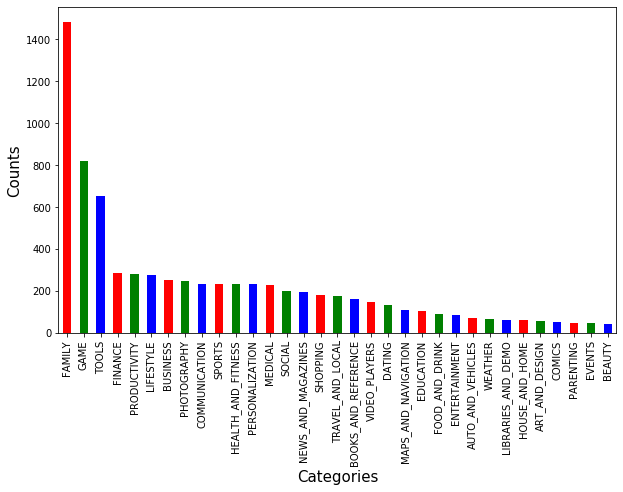

In [31]:
plt.subplots(figsize = (10, 6))

android_free['Category'].value_counts().plot(kind='bar', color = ['red', 'green', 'blue'])
plt.xlabel("Categories", fontsize = 15)
plt.ylabel("Counts", fontsize = 15)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

Amongst the "free" apps available on Google Play, we can see the vast majority are listed for Family-related content or Game-related content. Outside of that, the vast majority are geared towards tools as opposed to entertainment. 

### STEP 5: What are the most "free" popular app for a given category or genre?

In [33]:
test = android_free[['App', 'Reviews', "Category"]].groupby(["Category"])["Reviews"].nlargest(1)
list_of_app_names = [index for category, index in test.index]
android_free[android_free.index.isin(list_of_app_names) == True].sort_values("Category")  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4241,Textgram - write on photos,ART_AND_DESIGN,4.4,295237.0,Varies with device,"10,000,000+",Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,271920.0,16M,"10,000,000+",Free,0.0,Teen,Auto & Vehicles,2018-07-11,Varies with device,5.0 and up
117,Beauty Camera - Selfie Camera,BEAUTY,4.0,113715.0,Varies with device,"10,000,000+",Free,0.0,Everyone,Beauty,2017-08-03,Varies with device,Varies with device
4715,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2915189.0,Varies with device,"100,000,000+",Free,0.0,Teen,Books & Reference,2018-08-01,Varies with device,Varies with device
10200,Facebook Pages Manager,BUSINESS,4.0,1279800.0,Varies with device,"50,000,000+",Free,0.0,Everyone,Business,2018-08-06,Varies with device,Varies with device
4724,LINE WEBTOON - Free Comics,COMICS,4.5,1013944.0,Varies with device,"10,000,000+",Free,0.0,Teen,Comics,2018-07-31,Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,Varies with device,"1,000,000,000+",Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
7077,Zoosk Dating App: Meet Singles,DATING,4.0,516917.0,Varies with device,"10,000,000+",Free,0.0,Mature 17+,Dating,2018-08-02,Varies with device,Varies with device
832,"Learn languages, grammar & vocabulary with Mem...",EDUCATION,4.7,1107948.0,Varies with device,"10,000,000+",Free,0.0,Everyone,Education,2018-08-02,Varies with device,Varies with device
958,Netflix,ENTERTAINMENT,4.4,5456708.0,Varies with device,"100,000,000+",Free,0.0,Teen,Entertainment,2018-07-31,Varies with device,Varies with device


In [34]:
test_II = android_free[['App', 'Reviews', "Genres"]].groupby(["Genres"])["Reviews"].nlargest(1)
other_list_of_app_names = [index for genres, index in test_II.index]
android_free[android_free.index.isin(other_list_of_app_names) == True].sort_values("Genres").head(60)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7937,Shadow Fight 2,GAME,4.6,10981850.0,88M,"100,000,000+",Free,0.0,Everyone 10+,Action,2018-07-02,1.9.38,3.0 and up
2115,Strawberry Shortcake BerryRush,FAMILY,4.3,525552.0,48M,"10,000,000+",Free,0.0,Everyone,Action;Action & Adventure,2017-10-15,1.2.3,2.3 and up
1764,Pokémon GO,GAME,4.1,10424925.0,85M,"100,000,000+",Free,0.0,Everyone,Adventure,2018-07-23,0.111.3,4.4 and up
2206,ROBLOX,FAMILY,4.5,4450890.0,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
9671,Masha and the Bear Child Games,FAMILY,4.1,288606.0,92M,"10,000,000+",Free,0.0,Everyone,Adventure;Education,2018-05-08,2.7.4,4.0 and up
1917,Subway Surfers,GAME,4.5,27725352.0,76M,"1,000,000,000+",Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
2125,Disney Crossy Road,FAMILY,4.5,514088.0,83M,"10,000,000+",Free,0.0,Everyone,Arcade;Action & Adventure,2018-05-30,3.200.18289,4.4 and up
2069,LEGO® Friends: Heartlake Rush,FAMILY,4.5,23671.0,91M,"1,000,000+",Free,0.0,Everyone,Arcade;Pretend Play,2018-07-31,1.2.0,4.1 and up
4241,Textgram - write on photos,ART_AND_DESIGN,4.4,295237.0,Varies with device,"10,000,000+",Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device
26,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260.0,25M,"500,000+",Free,0.0,Everyone,Art & Design;Creativity,2017-10-11,1.0.8,4.0.3 and up


In [35]:
android_free[android_free.index.isin(other_list_of_app_names) == True].sort_values("Genres").tail(51)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1507,Zillow: Find Houses for Sale & Apartments for ...,HOUSE_AND_HOME,4.5,417907.0,34M,"10,000,000+",Free,0.0,Everyone,House & Home,2018-08-01,9.8.1.7425,4.4 and up
10729,MX Player Codec (ARMv7),LIBRARIES_AND_DEMO,4.3,332083.0,6.3M,"10,000,000+",Free,0.0,Everyone,Libraries & Demo,2018-04-23,1.9.19,4.0 and up
4587,Tinder,LIFESTYLE,4.0,2789775.0,68M,"100,000,000+",Free,0.0,Mature 17+,Lifestyle,2018-08-02,9.5.0,4.4 and up
7331,"OurHome – chores, rewards, groceries and calendar",FAMILY,4.3,3146.0,Varies with device,"100,000+",Free,0.0,Everyone,Lifestyle;Education,2018-01-31,3.13.2,4.1 and up
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995.0,100M,"10,000,000+",Free,0.0,Everyone,Lifestyle;Pretend Play,2018-07-16,9.0,4.0 and up
3820,"Waze - GPS, Maps, Traffic Alerts & Live Naviga...",MAPS_AND_NAVIGATION,4.6,7232629.0,Varies with device,"100,000,000+",Free,0.0,Everyone,Maps & Navigation,2018-07-29,Varies with device,Varies with device
2319,My Calendar - Period Tracker,MEDICAL,4.7,156410.0,14M,"5,000,000+",Free,0.0,Everyone,Medical,2018-08-03,5.9.6,4.1 and up
3974,Perfect Piano,GAME,4.2,828489.0,Varies with device,"50,000,000+",Free,0.0,Everyone,Music,2018-08-04,Varies with device,Varies with device
2142,Toy Guitar with songs for kids,FAMILY,4.3,1369.0,9.8M,"500,000+",Free,0.0,Everyone,Music & Audio;Music & Video,2016-03-05,1.0.3,2.3 and up
2051,Piano Kids - Music & Songs,FAMILY,4.6,46741.0,50M,"10,000,000+",Free,0.0,Everyone,Music;Music & Video,2018-08-03,1.73,4.0.3 and up


### STEP 6: Amongst the free apps, which categories/genres have the highest number of reviews on average? 

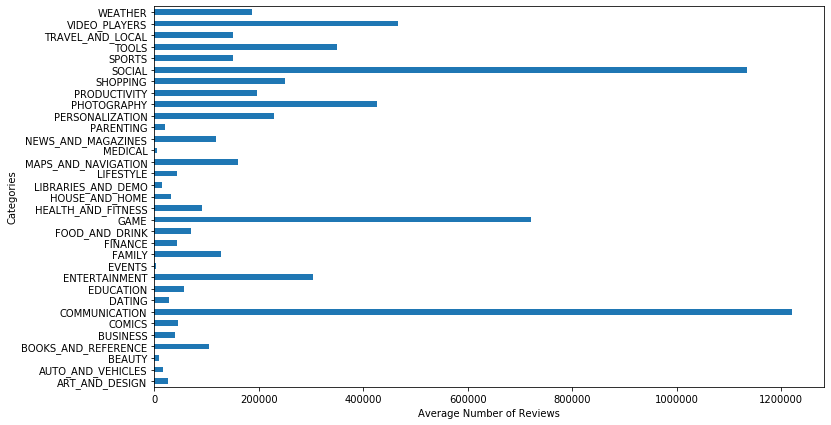

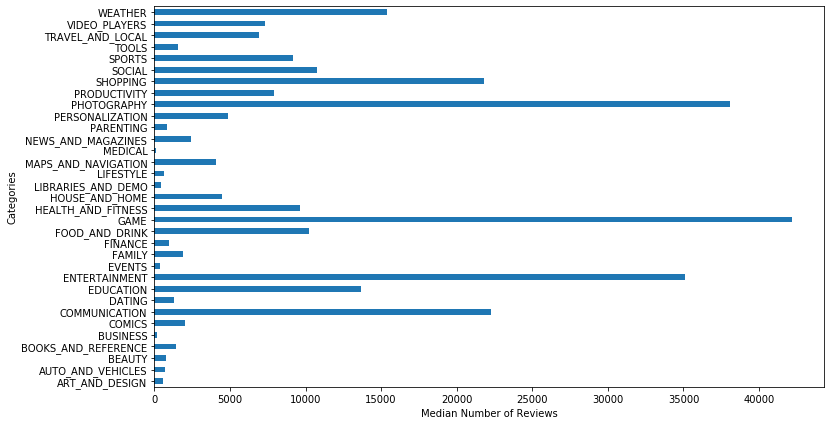

In [50]:
android_free[["Category", "Reviews"]].groupby("Category").agg([np.mean]).plot(kind = 'barh', figsize = (12,7), legend = None)
plt.xlabel("Average Number of Reviews")
plt.ylabel("Categories")
plt.show()

android_free[["Category", "Reviews"]].groupby("Category").agg([np.median]).plot(kind = 'barh', figsize = (12,7), legend = None)
plt.xlabel("Median Number of Reviews")
plt.ylabel("Categories")
plt.show()

It looks like social, communication, and game categories have the highest number of reviews given on average.  However, looking at the median, it seems that the top three categories are: game, photography and entertainment as the most reviewed categories of apps. 

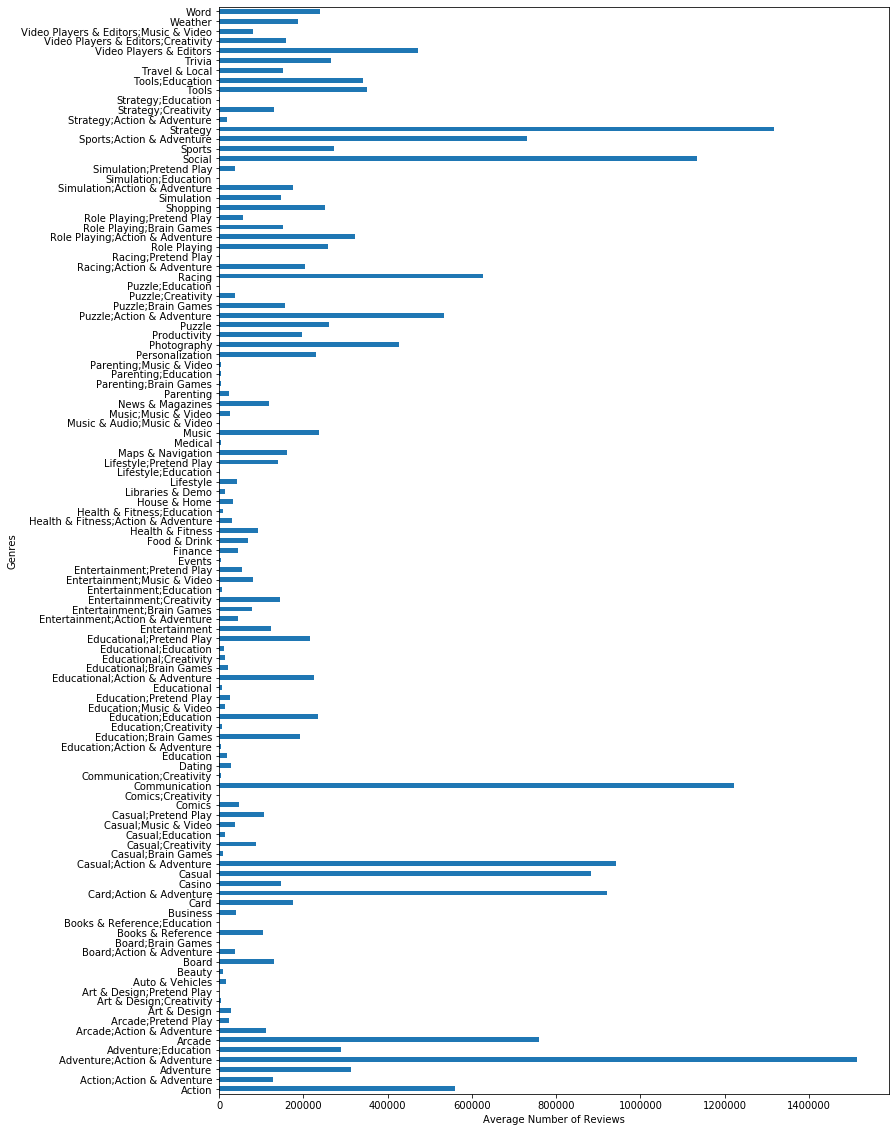

In [55]:
android_free[["Genres", "Reviews"]].groupby("Genres").agg([np.mean]).plot(kind = 'barh', figsize = (12,20), legend = None)
plt.xlabel("Average Number of Reviews")
plt.ylabel("Genres")
plt.show()


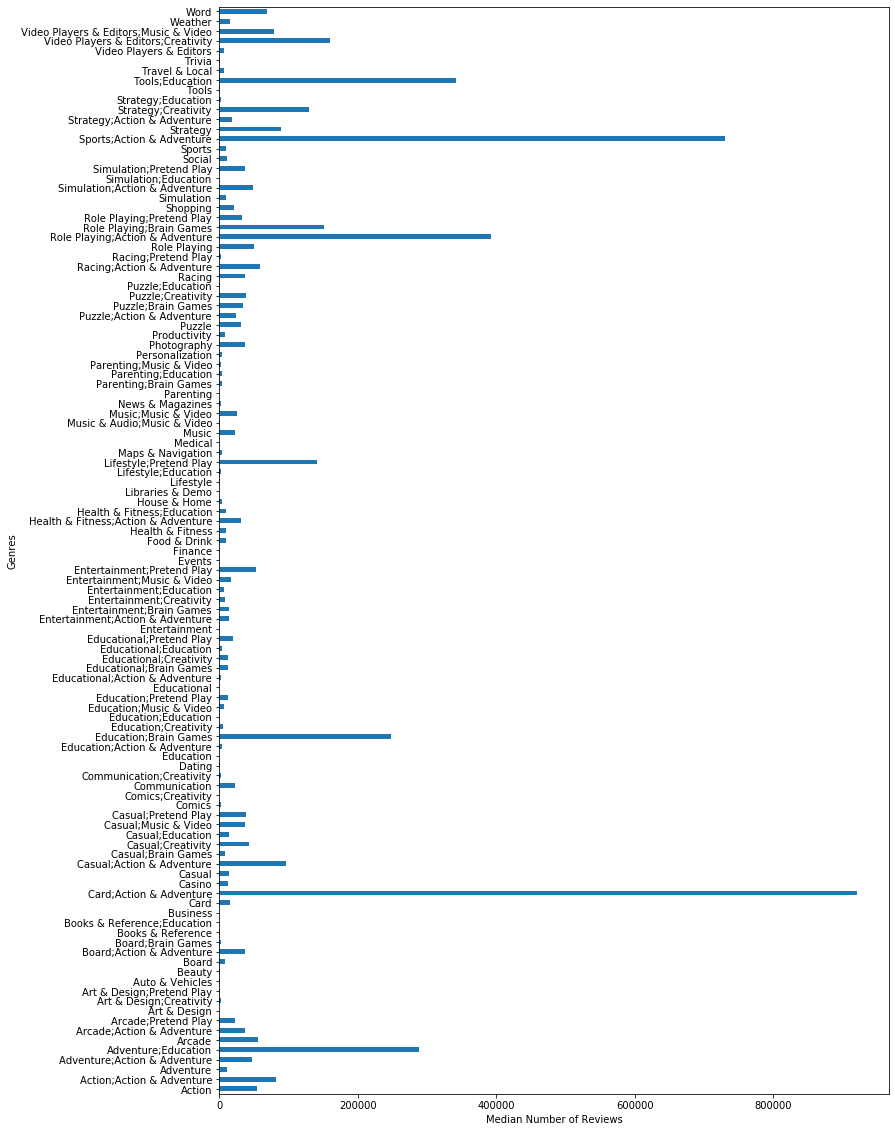

In [56]:
android_free[["Genres", "Reviews"]].groupby("Genres").agg([np.median]).plot(kind = 'barh', figsize = (12,20), legend = None)
plt.xlabel("Median Number of Reviews")
plt.ylabel("Genres")
plt.show()

Looking at genres, the majority of reviews seem to stem for a particular genre of games. Notably, with respect to averages: Action & Adventure-based games top the list followed by strategy games.  On the contrary, with respect to median scores, it seems like card-based games top this list in terms of number of reviews, followed by sports-based games. 

### STEP 7: Non-Free Apps

In [57]:
android_not_free = android_clean[android_clean['Price'] > 0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

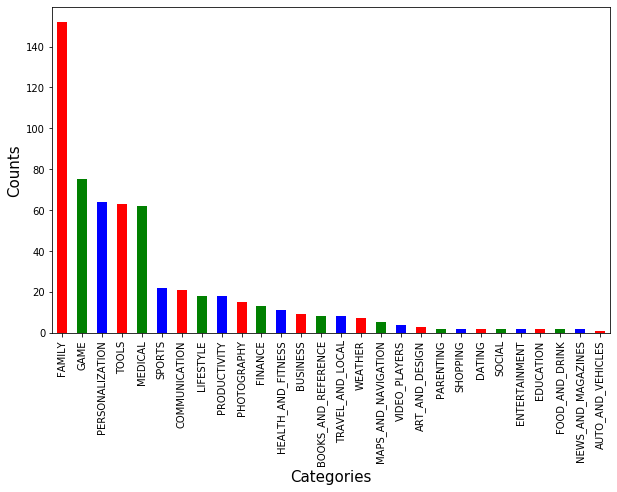

In [58]:
plt.subplots(figsize = (10, 6))

android_not_free['Category'].value_counts().plot(kind='bar', color = ['red', 'green', 'blue'])
plt.xlabel("Categories", fontsize = 15)
plt.ylabel("Counts", fontsize = 15)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)

In [59]:
test = android_not_free[['App', 'Reviews', "Category"]].groupby(["Category"])["Reviews"].nlargest(1)
list_of_app_names = [index for category, index in test.index]
android_not_free[android_not_free.index.isin(list_of_app_names) == True].sort_values("Category")  

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4759,X Launcher Pro - IOS Style Theme & Control Center,ART_AND_DESIGN,4.8,1216.0,8.6M,"10,000+",Paid,1.99,Everyone,Art & Design,2018-06-26,1.0.0,4.1 and up
4216,Ulysse Speedometer Pro,AUTO_AND_VEHICLES,4.6,4140.0,Varies with device,"50,000+",Paid,1.99,Everyone,Auto & Vehicles,2018-05-13,Varies with device,Varies with device
5341,Al'Quran Bahasa Indonesia PRO,BOOKS_AND_REFERENCE,4.7,1340.0,11M,"10,000+",Paid,4.49,Everyone,Books & Reference,2018-05-16,4.0.5,2.2 and up
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
7355,Threema,COMMUNICATION,4.5,51110.0,Varies with device,"1,000,000+",Paid,2.99,Everyone,Communication,2018-08-03,Varies with device,Varies with device
571,"Moco+ - Chat, Meet People",DATING,4.2,1546.0,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
854,Toca Life: Hospital,EDUCATION,4.7,3528.0,24M,"100,000+",Paid,3.99,Everyone,Education;Pretend Play,2018-06-12,1.1.1-play,4.4 and up
995,My Talking Pet,ENTERTAINMENT,4.6,6238.0,Varies with device,"100,000+",Paid,4.99,Everyone,Entertainment,2018-06-30,Varies with device,Varies with device
2241,Minecraft,FAMILY,4.5,2376564.0,Varies with device,"10,000,000+",Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device
6886,My Budget Book,FINANCE,4.7,19784.0,7.3M,"100,000+",Paid,2.99,Everyone,Finance,2018-06-13,7.6,4.0 and up


In [61]:
test_II = android_not_free[['App', 'Reviews', "Genres"]].groupby(["Genres"])["Reviews"].nlargest(1)
other_list_of_app_names = [index for genres, index in test_II.index]
android_not_free[android_not_free.index.isin(other_list_of_app_names) == True].sort_values("Genres").head(60)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4034,Hitman Sniper,GAME,4.6,408292.0,29M,"10,000,000+",Paid,0.99,Mature 17+,Action,2018-07-12,1.7.110758,4.1 and up
7584,Teen Titans GO Figure!,FAMILY,4.5,1985.0,28M,"10,000+",Paid,3.99,Everyone 10+,Action;Action & Adventure,2018-07-18,1.0.2,5.1 and up
9151,Lost Journey (Dreamsky),GAME,4.5,32344.0,29M,"1,000,000+",Paid,0.99,Everyone,Adventure,2016-10-21,1.3.12,3.0 and up
6202,LEGO ® Batman: Beyond Gotham,FAMILY,4.1,10758.0,8.0M,"100,000+",Paid,4.99,Everyone 10+,Adventure;Action & Adventure,2015-12-15,Varies with device,4.0.3 and up
5411,The Hunt for the Lost Treasure,FAMILY,4.6,7148.0,8.1M,"100,000+",Paid,2.99,Everyone,Adventure;Brain Games,2017-09-13,1.8,4.0.3 and up
10682,Fruit Ninja Classic,GAME,4.3,85468.0,36M,"1,000,000+",Paid,0.99,Everyone,Arcade,2018-06-08,2.4.1.485300,4.0.3 and up
2241,Minecraft,FAMILY,4.5,2376564.0,Varies with device,"10,000,000+",Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device
4759,X Launcher Pro - IOS Style Theme & Control Center,ART_AND_DESIGN,4.8,1216.0,8.6M,"10,000+",Paid,1.99,Everyone,Art & Design,2018-06-26,1.0.0,4.1 and up
4216,Ulysse Speedometer Pro,AUTO_AND_VEHICLES,4.6,4140.0,Varies with device,"50,000+",Paid,1.99,Everyone,Auto & Vehicles,2018-05-13,Varies with device,Varies with device
1832,Clue,GAME,4.6,19922.0,35M,"100,000+",Paid,1.99,Everyone 10+,Board,2018-07-30,2.2.5,5.0 and up


In [62]:
android_not_free[android_not_free.index.isin(other_list_of_app_names) == True].sort_values("Genres").tail(51)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6547,Skip-Bo™,GAME,4.4,33661.0,60M,"100,000+",Paid,2.99,Everyone,Card,2018-08-03,3.4.6,4.1 and up
2242,Card Wars - Adventure Time,FAMILY,4.3,129603.0,23M,"1,000,000+",Paid,2.99,Everyone 10+,Card;Action & Adventure,2016-02-11,1.11.0,2.3.3 and up
6341,Blackjack Verite Drills,GAME,4.6,17.0,4.7M,100+,Paid,14.00,Teen,Casino,2017-07-09,1.1.10,3.0 and up
7198,Theatre of the Absurd CE(Full),FAMILY,4.1,1143.0,15M,"10,000+",Paid,2.99,Everyone 10+,Casual,2013-05-21,1.0,2.0.1 and up
2154,"Alizay, pirate girl",FAMILY,4.5,197.0,11M,"1,000+",Paid,2.99,Everyone,Casual;Action & Adventure,2017-03-23,4.0.2,2.3 and up
2153,My Little Work – Garage,FAMILY,4.3,560.0,44M,"10,000+",Paid,3.99,Everyone,Casual;Education,2015-06-17,2.0.1,2.3 and up
8785,Dr. Panda & Toto's Treehouse,FAMILY,4.4,3397.0,9.5M,"50,000+",Paid,3.99,Everyone,Casual;Pretend Play,2014-12-09,1.8,4.0 and up
7355,Threema,COMMUNICATION,4.5,51110.0,Varies with device,"1,000,000+",Paid,2.99,Everyone,Communication,2018-08-03,Varies with device,Varies with device
571,"Moco+ - Chat, Meet People",DATING,4.2,1546.0,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
3993,C4droid - C/C++ compiler & IDE,FAMILY,4.7,2890.0,Varies with device,"50,000+",Paid,2.99,Everyone,Education,2017-08-26,Varies with device,Varies with device
